In [53]:
#first cell to import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv("Results.csv", sep=";", header=0)
print(df.dtypes)
df.head()

reader               object
tag_size            float64
tag_shape            object
water_height        float64
tag_reader_angel    float64
rfid_reads          float64
pulses              float64
runtime             float64
true_full_rot         int64
average_RPM          object
success_rate         object
dtype: object


,reader,tag_size,tag_shape,water_height,tag_reader_angel,rfid_reads,pulses,runtime,true_full_rot,average_RPM,success_rate
0,RMFRC522,25.0,circle,0.0,0.0,165.0,108910.0,206624.0,544,158.127807,0.303308824
1,RMFRC522,25.0,circle,0.0,0.0,336.0,223736.0,431159.0,1118,155.6752845,0.300536673
2,RMFRC522,25.0,circle,0.0,0.0,60.0,77869.0,96047.0,389,243.2215478,0.154241645
3,RMFRC522,25.0,circle,0.0,0.0,55.0,93208.0,116244.0,466,240.5491896,0.118025751
4,RMFRC522,25.0,circle,0.0,0.0,123.0,152035.0,186101.0,760,245.0846583,0.161842105


In [55]:
df.columns

Index(['reader', 'tag_size', 'tag_shape', 'water_height', 'tag_reader_angel',
       'rfid_reads', 'pulses', 'runtime', 'true_full_rot', 'average_RPM',
       'success_rate'],
      dtype='object')

In [56]:
df = df.dropna(subset=["reader"])

# Convert 'average_RPM' and 'success_rate' to numeric
df['average_RPM'] = pd.to_numeric(df['average_RPM'], errors='coerce')
df['success_rate'] = pd.to_numeric(df['success_rate'], errors='coerce')

df.dtypes

reader               object
tag_size            float64
tag_shape            object
water_height        float64
tag_reader_angel    float64
rfid_reads          float64
pulses              float64
runtime             float64
true_full_rot         int64
average_RPM         float64
success_rate        float64
dtype: object

In [57]:
df.head()

,reader,tag_size,tag_shape,water_height,tag_reader_angel,rfid_reads,pulses,runtime,true_full_rot,average_RPM,success_rate
0,RMFRC522,25.0,circle,0.0,0.0,165.0,108910.0,206624.0,544,158.127807,0.303309
1,RMFRC522,25.0,circle,0.0,0.0,336.0,223736.0,431159.0,1118,155.675285,0.300537
2,RMFRC522,25.0,circle,0.0,0.0,60.0,77869.0,96047.0,389,243.221548,0.154242
3,RMFRC522,25.0,circle,0.0,0.0,55.0,93208.0,116244.0,466,240.549190,0.118026
4,RMFRC522,25.0,circle,0.0,0.0,123.0,152035.0,186101.0,760,245.084658,0.161842


In [58]:
df['reader'].unique()

array(['RMFRC522', 'PN532', 'ID20-LA', 'ID12-LA'], dtype=object)

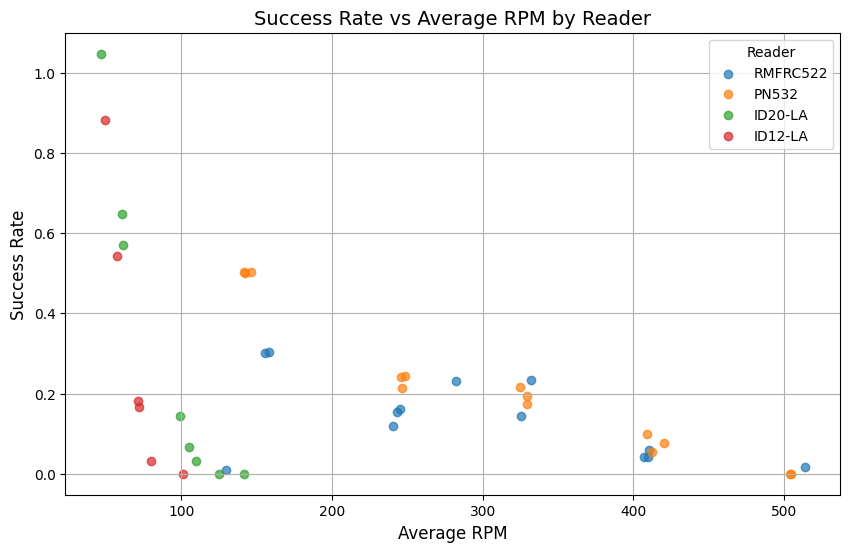

In [60]:
# Assuming your DataFrame is named df
# Example scatter plot for success_rate vs. average_RPM, grouped by reader
plt.figure(figsize=(10, 6))

# Loop through unique readers to plot each with a different color
for reader in df['reader'].unique():
    reader_data = df[df['reader'] == reader]
    plt.scatter(reader_data['average_RPM'], reader_data['success_rate'], label=reader, alpha=0.7)

# Add labels, legend, and title
plt.title('Success Rate vs Average RPM by Reader', fontsize=14)
plt.xlabel('Average RPM', fontsize=12)
plt.ylabel('Success Rate', fontsize=12)
plt.legend(title='Reader')
plt.grid(True)

# Show the plot
plt.show()

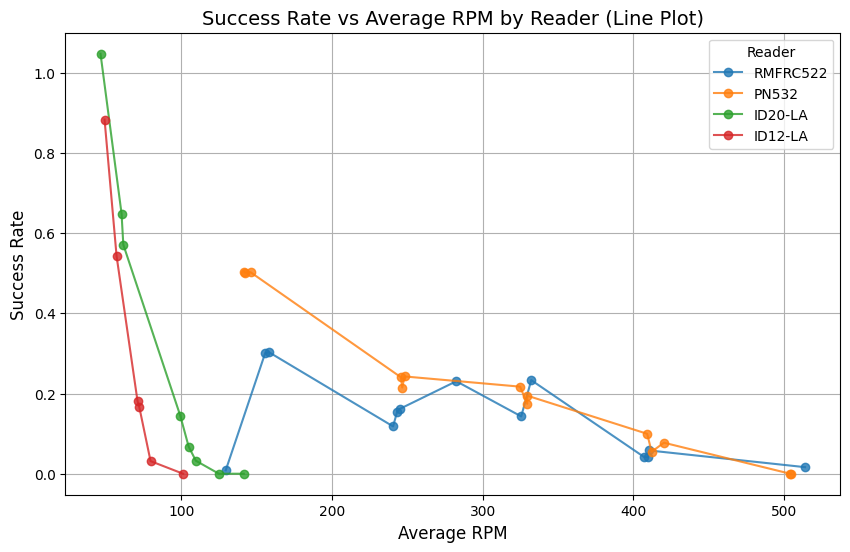

In [61]:
# Create the figure
plt.figure(figsize=(10, 6))

# Loop through unique readers to plot each with a different line and dots
for reader in df['reader'].unique():
    reader_data = df[df['reader'] == reader].sort_values(by='average_RPM')  # Sort by average_RPM for smooth lines
    plt.plot(reader_data['average_RPM'], reader_data['success_rate'], marker='o', label=reader, alpha=0.8)

# Add labels, legend, and title
plt.title('Success Rate vs Average RPM by Reader (Line Plot)', fontsize=14)
plt.xlabel('Average RPM', fontsize=12)
plt.ylabel('Success Rate', fontsize=12)
plt.legend(title='Reader')
plt.grid(True)

# Show the plot
plt.show()